In [2]:
import pandas as pd
import numpy as np

01

In [3]:
train = pd.read_csv('train3_C.csv')
train.head()

,data,public_transport_usage,pedestrian_count,temperature,humidity,public_transport_delay,weather_conditions,day_of_week,pedestrian_incidents
0,2023-01-01,288.333333,863.833333,12.704031,47.833333,14.647987,Rain,Sunday,46
1,2023-01-02,232.541667,830.333333,11.343628,63.666667,11.660099,Snow,Monday,40
2,2023-01-03,267.458333,891.125000,13.902640,57.125000,14.749126,Fog,Tuesday,54
3,2023-01-04,257.791667,876.625000,17.733302,58.791667,14.248311,"Clear, Fog, Snow",Wednesday,51
4,2023-01-05,281.083333,1036.291667,13.445025,54.916667,13.869797,"Fog, Rain",Thursday,54


In [4]:
train[(train['day_of_week'] == 'Friday')].sort_values('humidity')

,data,public_transport_usage,pedestrian_count,temperature,humidity,public_transport_delay,weather_conditions,day_of_week,pedestrian_incidents
2229,2094-01-29,294.625000,997.208333,9.849309,44.708333,15.496846,"Clear, Fog, Rain, Snow",Friday,59
3306,2129-01-21,260.416667,1162.833333,12.541912,46.916667,16.476123,Fog,Friday,37
1347,2066-01-15,309.208333,775.541667,12.560052,47.000000,13.381304,Fog,Friday,57
3359,2131-01-12,310.500000,963.166667,15.380422,47.125000,16.975002,Clear,Friday,54
3121,2123-01-22,271.625000,1110.458333,18.660254,47.416667,13.198695,Clear,Friday,51
...,...,...,...,...,...,...,...,...,...
1384,2067-01-21,305.500000,976.500000,10.083327,71.625000,13.761111,Fog,Friday,58
532,2040-01-06,314.958333,1055.875000,10.378157,71.833333,15.642129,"Rain, Snow",Friday,55
2995,2119-01-20,289.666667,1060.500000,10.446521,72.708333,16.311543,Fog,Friday,51
2289,2096-01-27,242.791667,912.500000,15.464260,72.875000,13.152052,Clear,Friday,53


In [5]:
train[train['day_of_week'].isin(['Friday', 'Saturday'])].sort_values('humidity')

,data,public_transport_usage,pedestrian_count,temperature,humidity,public_transport_delay,weather_conditions,day_of_week,pedestrian_incidents
2229,2094-01-29,294.625000,997.208333,9.849309,44.708333,15.496846,"Clear, Fog, Rain, Snow",Friday,59
1964,2086-01-12,248.125000,1054.333333,12.067450,44.833333,13.239301,Clear,Saturday,38
3241,2127-01-18,261.708333,987.125000,17.468757,45.625000,16.308123,Fog,Saturday,53
3306,2129-01-21,260.416667,1162.833333,12.541912,46.916667,16.476123,Fog,Friday,37
1347,2066-01-15,309.208333,775.541667,12.560052,47.000000,13.381304,Fog,Friday,57
...,...,...,...,...,...,...,...,...,...
79,2025-01-18,292.666667,1066.166667,10.892304,71.791667,11.683658,Clear,Saturday,59
532,2040-01-06,314.958333,1055.875000,10.378157,71.833333,15.642129,"Rain, Snow",Friday,55
2995,2119-01-20,289.666667,1060.500000,10.446521,72.708333,16.311543,Fog,Friday,51
2289,2096-01-27,242.791667,912.500000,15.464260,72.875000,13.152052,Clear,Friday,53


In [6]:
round(306.250000, 2)

306.25

In [7]:
qv_count = train['pedestrian_count'].quantile(0.25)


train_c = train[(train['pedestrian_count'] < qv_count)]
train_c.head()

,data,public_transport_usage,pedestrian_count,temperature,humidity,public_transport_delay,weather_conditions,day_of_week,pedestrian_incidents
0,2023-01-01,288.333333,863.833333,12.704031,47.833333,14.647987,Rain,Sunday,46
1,2023-01-02,232.541667,830.333333,11.343628,63.666667,11.660099,Snow,Monday,40
2,2023-01-03,267.458333,891.125000,13.902640,57.125000,14.749126,Fog,Tuesday,54
3,2023-01-04,257.791667,876.625000,17.733302,58.791667,14.248311,"Clear, Fog, Snow",Wednesday,51
5,2023-01-06,284.375000,873.125000,9.622476,58.125000,14.759618,Snow,Friday,48


In [10]:
incidents = train_c['pedestrian_incidents'].max() - train_c['pedestrian_incidents'].min()
incidents

np.int64(48)

In [29]:
def fun(x):
    return len(x.split(',')) 

In [30]:
train['coded'] = train['weather_conditions'].apply(fun)

In [31]:
train['coded'].sum()

np.int64(4287)

02

In [42]:
trainss = pd.read_csv('trains_b.csv')
trainss.head()

,Country,Region,Economy,Health
0,Switzerland,J,1.40,0.94
1,Iceland,J,1.30,0.95
2,Denmark,J,1.33,0.87
3,Norway,J,1.46,0.89
4,Canada,F,1.33,0.91


<Axes: xlabel='Region'>

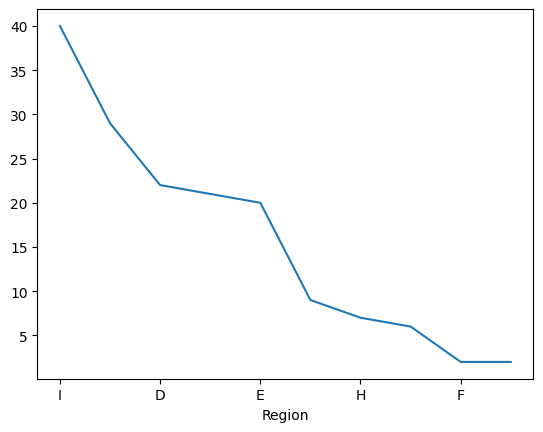

In [104]:
trainss['Region'].value_counts().plot(kind = 'line')

In [67]:
tr = pd.read_csv('train4_b.csv')
tr.head()

,Age,Sex,Credit amount,Duration
0,67,0,1169,6
1,22,1,5951,48
2,49,0,2096,12
3,45,0,7882,42
4,53,0,4870,24


array([<Axes: ylabel='Age'>, <Axes: ylabel='Credit amount'>,
       <Axes: ylabel='Duration'>], dtype=object)

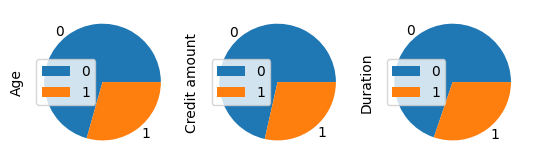

In [75]:
tr.groupby('Sex').sum().plot(kind = 'pie', subplots=True)

03

In [73]:
train5 = pd.read_csv('train5_b.csv')
train5.head()

,Soil_Type,Sunlight_Hours,Temperature,Humidity
0,2,5.192294,31.719602,61.591861
1,3,4.033133,28.919484,52.422276
2,2,8.892769,23.179059,44.660539
3,2,8.241144,18.465886,46.433227
4,3,8.374043,18.128741,63.625923


<Axes: >

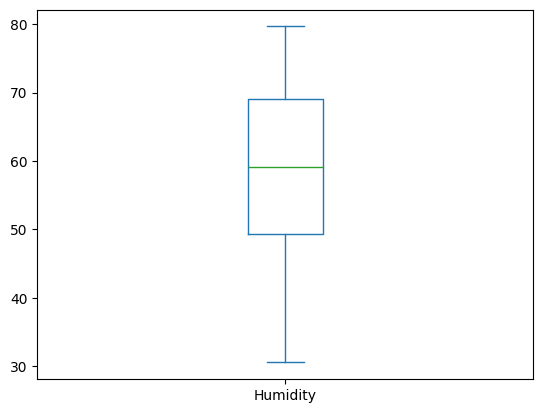

In [76]:
train5['Humidity'].plot(kind = 'box')

04

In [77]:
catty = pd.read_csv('catti.csv')
catty.head()

,cat,total_fat,protein,calcium
0,3,20,17,25
1,3,12,18,25
2,3,35,14,25
3,3,43,21,30
4,3,35,21,25


<Axes: xlabel='cat'>

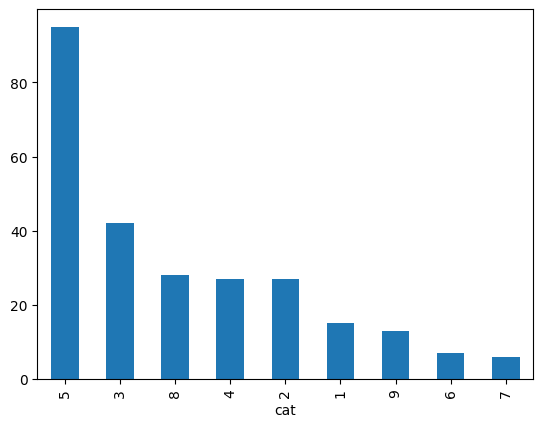

In [83]:
catty['cat'].value_counts().plot(kind = 'bar')

05

In [105]:
trainy = pd.read_csv('train5_C.csv')
trainy.head()

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,TotalSlope,NightSki,TotalLifts,LiftCapacity
0,Alpendorf (Ski amedé),Austria,1980,740,52,115,No,49,75398
1,Soldeu-Pas de la Casa/​Grau Roig/​El Tarter/​C...,Andorra,2640,1710,47,210,Yes,72,99017
2,Oberau (Wildschönau),Austria,1130,900,30,2,No,2,1932
3,Dachstein West,Austria,1620,780,42,51,Yes,36,32938
4,Rosa Khutor,Southern Russia,2320,940,22,77,No,27,49228


In [106]:
trainy['Country'].value_counts(ascending=True)

Country
Netherlands                1
Siberia (Russia)           1
Serbia                     1
Ukraine                    1
Greece                     1
Bosnia and Herzegovina     1
Lithuania                  1
Liechtenstein              1
Czech Republic             2
Romania                    2
Poland                     2
Finland                    3
Slovenia                   4
Bulgaria                   4
Southern Russia            4
United Kingdom             4
Slovakia                   5
Andorra                    5
Sweden                     6
Denmark                    8
Spain                      8
Norway                    10
Germany                   24
Italy                     44
Switzerland               61
France                    83
Austria                   89
Name: count, dtype: int64

In [114]:
austria = trainy[(trainy['Country'] == 'Austria')]

In [117]:
austria[austria['HighestPoint'] == 780]

,Resort,Country,HighestPoint,LowestPoint,DayPassPriceAdult,TotalSlope,NightSki,TotalLifts,LiftCapacity
206,Kirchdorf,Austria,780,640,30,5,No,4,3570


In [123]:
lif = trainy[(trainy['NightSki'] == 'Yes')]['LiftCapacity']

In [120]:
lif.quantile(0.75) - lif.quantile(0.25)

np.float64(45356.0)

In [121]:
round(45356.0, 2)

45356.0

In [124]:
def fun(x):
    if 'Russia' in x:
        return 1
    else:
        return 0

In [126]:
trainy['coded'] = trainy['Country'].apply(fun)

In [127]:
trainy['coded'].sum()

np.int64(5)

In [128]:
round(5, 2)

5

06

In [11]:
mus = pd.read_csv('music.csv')
mus.head()

,song_name,album_name,track_number,popularity,danceability,energy,loudness,mode,instrumentalness,valence,tempo
0,Tom Sawyer,Moving Pictures (40th Anniversary Super Deluxe),1,31,0.526,0.881,-7.447,0,0.005770,0.655,87.392
1,Red Barchetta,Moving Pictures (40th Anniversary Super Deluxe),2,28,0.530,0.933,-7.377,1,0.000081,0.348,144.143
2,YYZ,Moving Pictures (40th Anniversary Super Deluxe),3,28,0.504,0.909,-8.101,1,0.842000,0.402,140.854
3,Limelight,Moving Pictures (40th Anniversary Super Deluxe),4,29,0.573,0.878,-7.990,0,0.000281,0.842,131.005
4,The Camera Eye,Moving Pictures (40th Anniversary Super Deluxe),5,26,0.356,0.793,-8.495,1,0.398000,0.149,165.004


In [12]:
df = mus[mus['album_name'] == 'Different Stages']

In [13]:
df['loudness'].abs()

334     6.519
335     7.332
336     8.165
337     7.231
338     7.830
339     6.430
340     8.207
341     7.166
342     7.545
343     8.833
344     7.736
345    14.393
346     7.268
347     7.949
348     8.488
349     8.451
350     6.319
351     6.466
352     6.089
353     7.672
354     7.340
355     7.795
356     7.124
357    10.479
358     7.325
359     7.188
360     7.257
361     7.322
362     6.051
363     6.081
364     7.362
365     7.043
366     5.724
367     7.605
368     6.058
369     5.809
370     5.567
371     5.729
372     6.425
Name: loudness, dtype: float64

In [16]:
ds = mus[mus['album_name'] == 'Different Stages']

In [17]:
ds['loudness'].abs().max()

np.float64(14.393)

In [18]:
ds['song_name'].loc[345]

'2112 (Discovery) - Live'

In [19]:
mus[mus['song_name'] == '2112 (Discovery) - Live']

,song_name,album_name,track_number,popularity,danceability,energy,loudness,mode,instrumentalness,valence,tempo
345,2112 (Discovery) - Live,Different Stages,12,17,0.338,0.273,-14.393,1,0.0478,0.27,64.781


In [189]:
mus.head()

,song_name,album_name,track_number,popularity,danceability,energy,loudness,mode,instrumentalness,valence,tempo
0,Tom Sawyer,Moving Pictures (40th Anniversary Super Deluxe),1,31,0.526,0.881,-7.447,0,0.005770,0.655,87.392
1,Red Barchetta,Moving Pictures (40th Anniversary Super Deluxe),2,28,0.530,0.933,-7.377,1,0.000081,0.348,144.143
2,YYZ,Moving Pictures (40th Anniversary Super Deluxe),3,28,0.504,0.909,-8.101,1,0.842000,0.402,140.854
3,Limelight,Moving Pictures (40th Anniversary Super Deluxe),4,29,0.573,0.878,-7.990,0,0.000281,0.842,131.005
4,The Camera Eye,Moving Pictures (40th Anniversary Super Deluxe),5,26,0.356,0.793,-8.495,1,0.398000,0.149,165.004


In [191]:
inst = mus[(mus['mode'] == 0)]['instrumentalness']

In [193]:
inst.quantile(0.75)

np.float64(0.26475000000000004)

In [194]:
round(0.26475000000000004, 2)

0.26

In [195]:
def fun(x):
    return len(x)

In [196]:
mus['coded'] = mus['song_name'].apply(fun)

In [197]:
mus['coded'].mean()

np.float64(30.758928571428573)

In [198]:
round(30.758928571428573, 2)

30.76